In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from aging.plotting import format_plots, figure, legend
from sklearn.decomposition import NMF
from tqdm.auto import tqdm
import colorcet as cc

In [2]:
format_plots()

In [3]:
version = 7  # arhmm version
df = pd.read_parquet(f'/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/ontogeny_males_clean_v1.parquet')

In [4]:
df.index.names

FrozenList(['age', 'subject_name', 'session_name', 'uuid'])

In [5]:
df.head()

relabeled_syllables                                                                0   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.057759   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.058875   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.063523   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.053075   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.099168   

relabeled_syllables                                                                1   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.017353   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.012824   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.007531   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.020833   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.006988   

relabeled_syllables                                                                2   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.008924   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.007287   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.009168   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.011409   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.003993   

relabeled_syllables                                                                3   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.002231   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.002040   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.000982   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.009425   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.000666   

relabeled_syllables                                                                4   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.009916   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.009327   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.009823   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.013641   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.010316   

relabeled_syllables                                                                5   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.013386   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.017196   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.012443   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.013641   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.004659   

relabeled_syllables                                                                6   \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0

In [6]:
df.groupby(['subject_name', 'session_name'])[0].count()

subject_name     session_name                      
16M_01           otgy_16M_01                           4
16M_02           otgy_16M_02                           4
16M_03           otgy_16M_03                           4
16M_04           otgy_16M_04                           4
20M_01           otgy_20M_01                           4
                                                      ..
m24_c06_b04_s01  ontogeny_cohorts_12months_28042021    1
                 ontogeny_cohorts_18months_29042021    1
m24b04c03        ontogeny_cohorts_5wks                 1
m3_c03_b03_s01   3m_ontogey_cohorts_19042021           1
m7_c02_b03_s01   3m_ontogey_cohorts_19042021           1
Name: 0, Length: 236, dtype: int64

In [7]:
df.reset_index().query('subject_name == "16M_01"')

relabeled_syllables,age,subject_name,session_name,uuid,0,1,2,3,4,5,...,67,68,69,70,71,72,73,74,75,76
91,16,16M_01,otgy_16M_01,1bd5c31e-f16e-42af-b0f8-367d3ff74722,0.066142,0.027887,0.036825,0.023239,0.038970,0.025742,...,0.0,0.000000,0.000715,0.001073,0.0,0.0,0.0,0.0,0.0,0.0
92,16,16M_01,otgy_16M_01,795333e0-511f-4ba6-bbca-25ef5ef87331,0.061121,0.035778,0.043828,0.021765,0.031604,0.032499,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
93,16,16M_01,otgy_16M_01,e81b623a-c72a-4321-864a-a59d2b9032af,0.057218,0.034918,0.030516,0.030516,0.015552,0.039319,...,0.0,0.000000,0.000000,0.000293,0.0,0.0,0.0,0.0,0.0,0.0
94,16,16M_01,otgy_16M_01,f6ae0cf1-332c-474b-a158-e88b71e2de2e,0.067961,0.040352,0.047937,0.033070,0.023058,0.016080,...,0.0,0.000303,0.000607,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
[x for x in df.index.levels[1] if 'M' in x]

['16M_01',
 '16M_02',
 '16M_03',
 '16M_04',
 '20M_01',
 '20M_02',
 '20M_03',
 '20M_04',
 '28M_01',
 '28M_02',
 '28M_03',
 '28M_04',
 '32M_01',
 '32M_02',
 '32M_03',
 '32M_04',
 '36M_01',
 '36M_02',
 '36M_03',
 '36M_04',
 '56M_01',
 '56M_02',
 '56M_03',
 '56M_04',
 '72M_01',
 '72M_02',
 '72M_03',
 '72M_04',
 '80M_01',
 '80M_02',
 '80M_03',
 '80M_04',
 '84M_01',
 '84M_02',
 '84M_03',
 '84M_04']

In [9]:
df.groupby('age').count()[0]

age
3     16
5     16
7     16
9     16
12    27
16    16
20    16
24    24
28    16
32    16
35    16
36    16
52    26
56    16
72    16
78    27
80    15
84    16
90    16
Name: 0, dtype: int64

In [10]:
sample = df.groupby('age').sample(n=15)

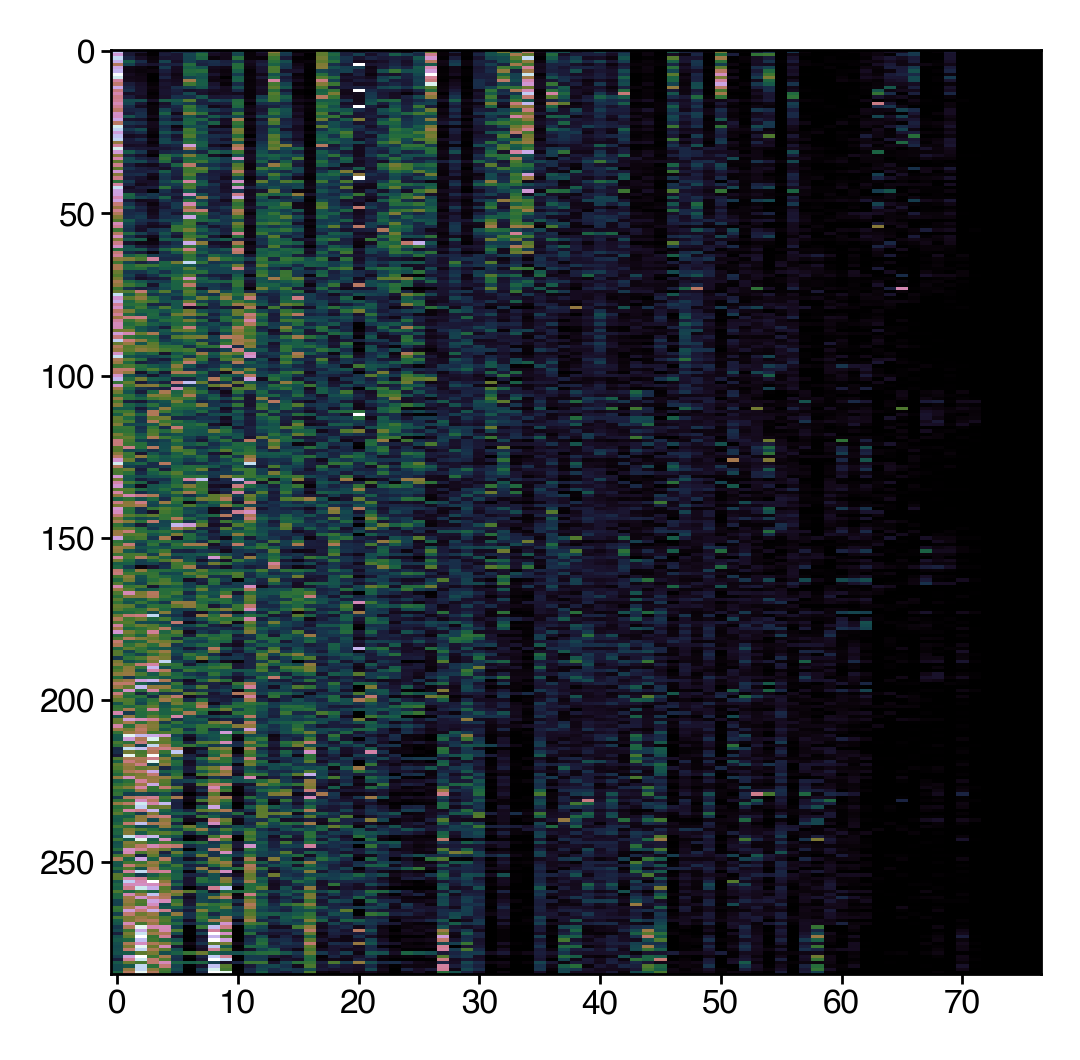

In [11]:
plt.imshow(sample, aspect='auto', vmax=0.1, cmap='cubehelix', interpolation='none')

In [12]:
sample.head()

relabeled_syllables                                                                0   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0.079073   
    m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853  0.069469   
    m04b04c01    ontogeny_cohorts_3wks 01c82ad7-a33e-49f3-af1b-2fb22bb0d9a9  0.083750   
    m03b03c01    ontogeny_cohorts_3wks 1cd99d3b-cf22-4b80-b97a-bfd3bcff088d  0.074443   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.053075   

relabeled_syllables                                                                1   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0.011247   
    m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853  0.011115   
    m04b04c01    ontogeny_cohorts_3wks 01c82ad7-a33e-49f3-af1b-2fb22bb0d9a9  0.014687   
    m03b03c01    ontogeny_cohorts_3wks 1cd99d3b-cf22-4b80-b97a-bfd3bcff088d  0.027101   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.020833   

relabeled_syllables                                                                2   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0.009884   
    m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853  0.004168   
    m04b04c01    ontogeny_cohorts_3wks 01c82ad7-a33e-49f3-af1b-2fb22bb0d9a9  0.007812   
    m03b03c01    ontogeny_cohorts_3wks 1cd99d3b-cf22-4b80-b97a-bfd3bcff088d  0.016123   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.011409   

relabeled_syllables                                                                3   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0.001363   
    m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853  0.001042   
    m04b04c01    ontogeny_cohorts_3wks 01c82ad7-a33e-49f3-af1b-2fb22bb0d9a9  0.002812   
    m03b03c01    ontogeny_cohorts_3wks 1cd99d3b-cf22-4b80-b97a-bfd3bcff088d  0.004117   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.009425   

relabeled_syllables                                                                4   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0.010566   
    m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853  0.012157   
    m04b04c01    ontogeny_cohorts_3wks 01c82ad7-a33e-49f3-af1b-2fb22bb0d9a9  0.009375   
    m03b03c01    ontogeny_cohorts_3wks 1cd99d3b-cf22-4b80-b97a-bfd3bcff088d  0.021612   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.013641   

relabeled_syllables                                                                5   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0.016360   
    m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853  0.010420   
    m04b04c01    ontogeny_cohorts_3wks 01c82ad7-a33e-49f3-af1b-2fb22bb0d9a9  0.010313   
    m03b03c01    ontogeny_cohorts_3wks 1cd99d3b-cf22-4b80-b97a-bfd3bcff088d  0.008233   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.013641   

relabeled_syllables                                                                6   \
age subject_name session_name          uuid                                             
3   m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a  0

In [13]:
plt.imshow(new_grouping, aspect='auto', interpolation='none', vmax=0.1)

NameError: name 'new_grouping' is not defined

In [14]:
arr = []
ages = []
for age, x in sample.groupby('age'):
    arr.append(x.to_numpy().flatten())
    ages.append(age)
arr = np.array(arr)

In [15]:
errs = []
for i in range(1, 10):
    nmf = NMF(n_components=i, max_iter=500)
    nmf.fit(arr.T)
    errs.append(nmf.reconstruction_err_)

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


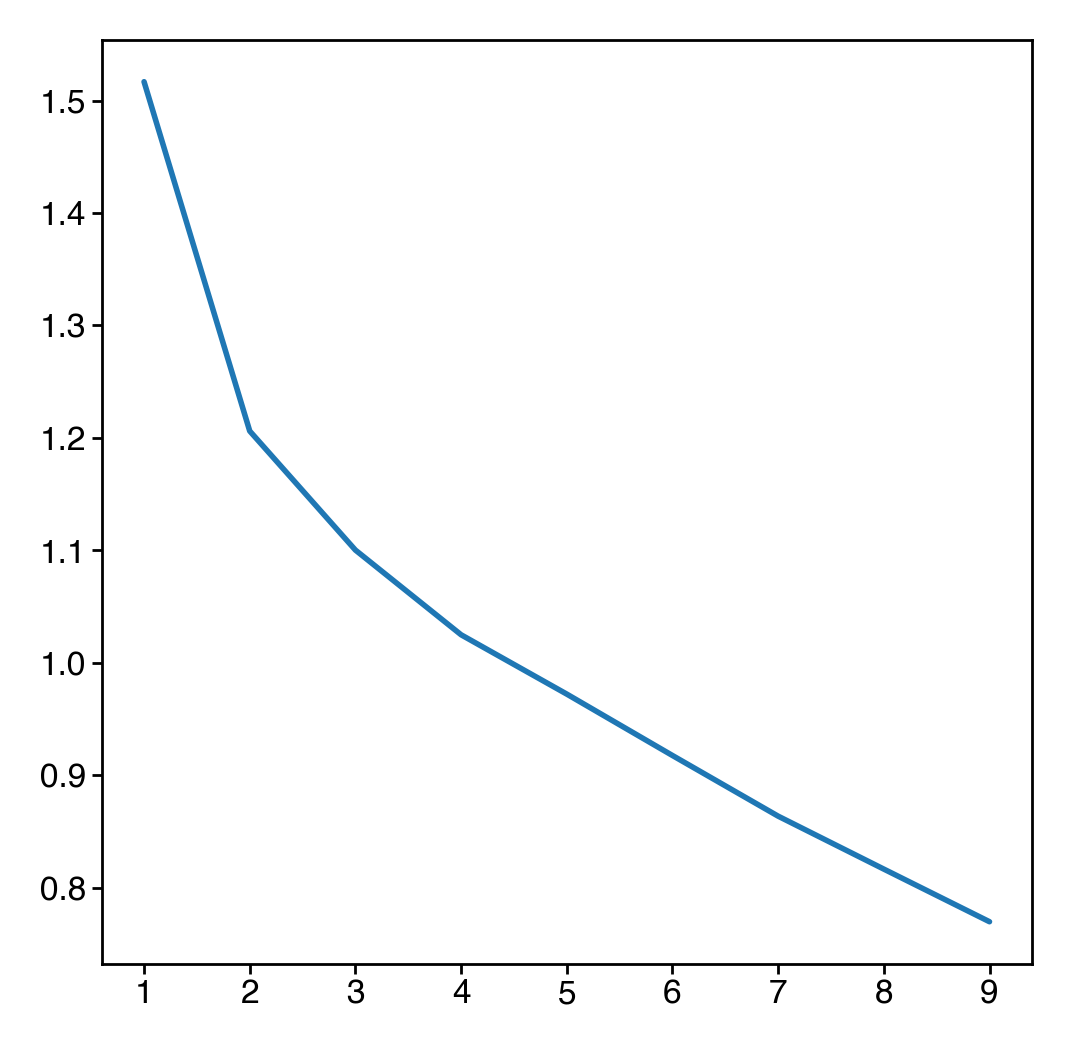

In [16]:
plt.plot(range(1, 10), errs)

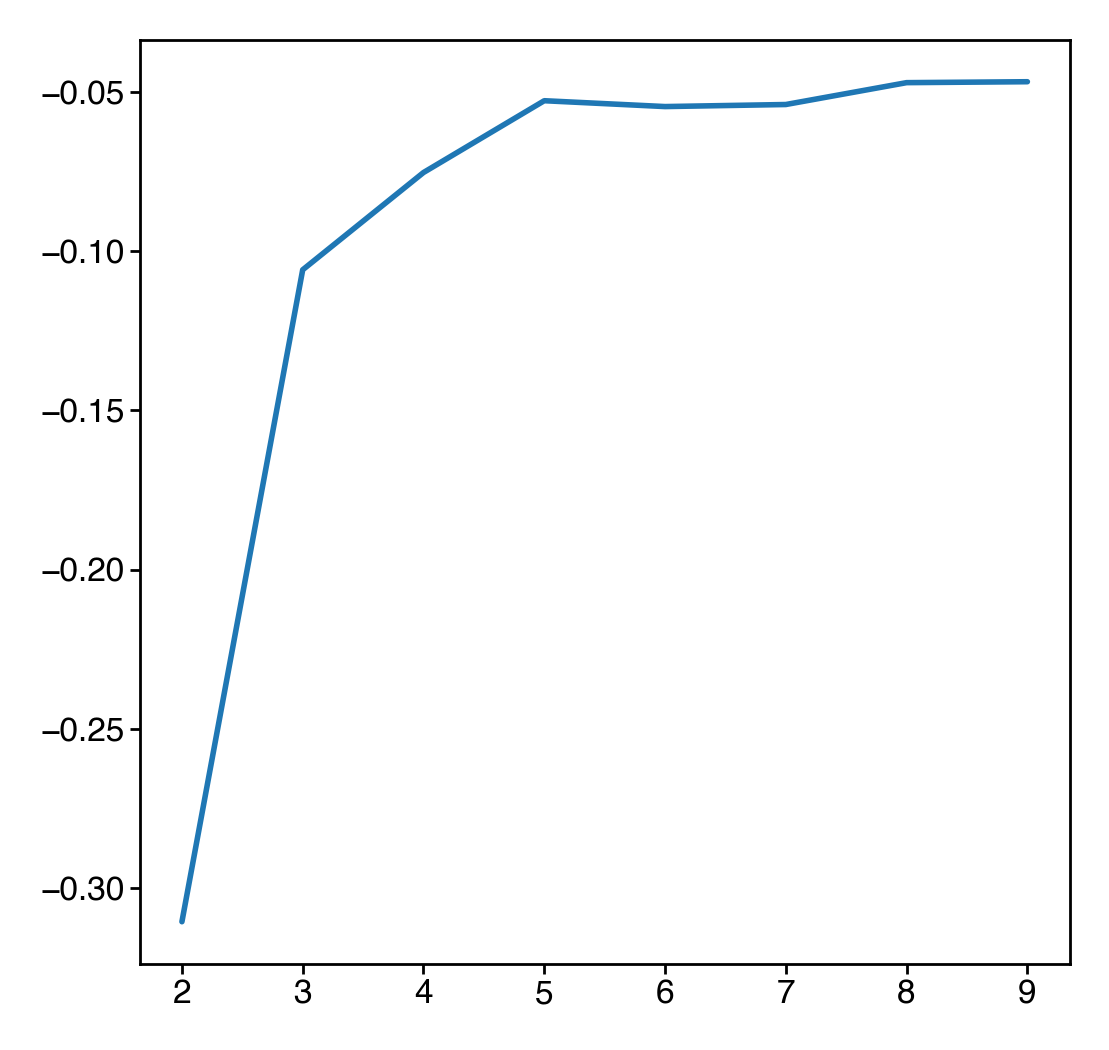

In [17]:
plt.plot(range(2, 10), np.diff(errs))

In [26]:
nmf = NMF(n_components=3, max_iter=1000)
nmf.fit(arr.T)


NMF(max_iter=1000, n_components=3)

[Text(0.5, 0, 'Age (weeks)')]

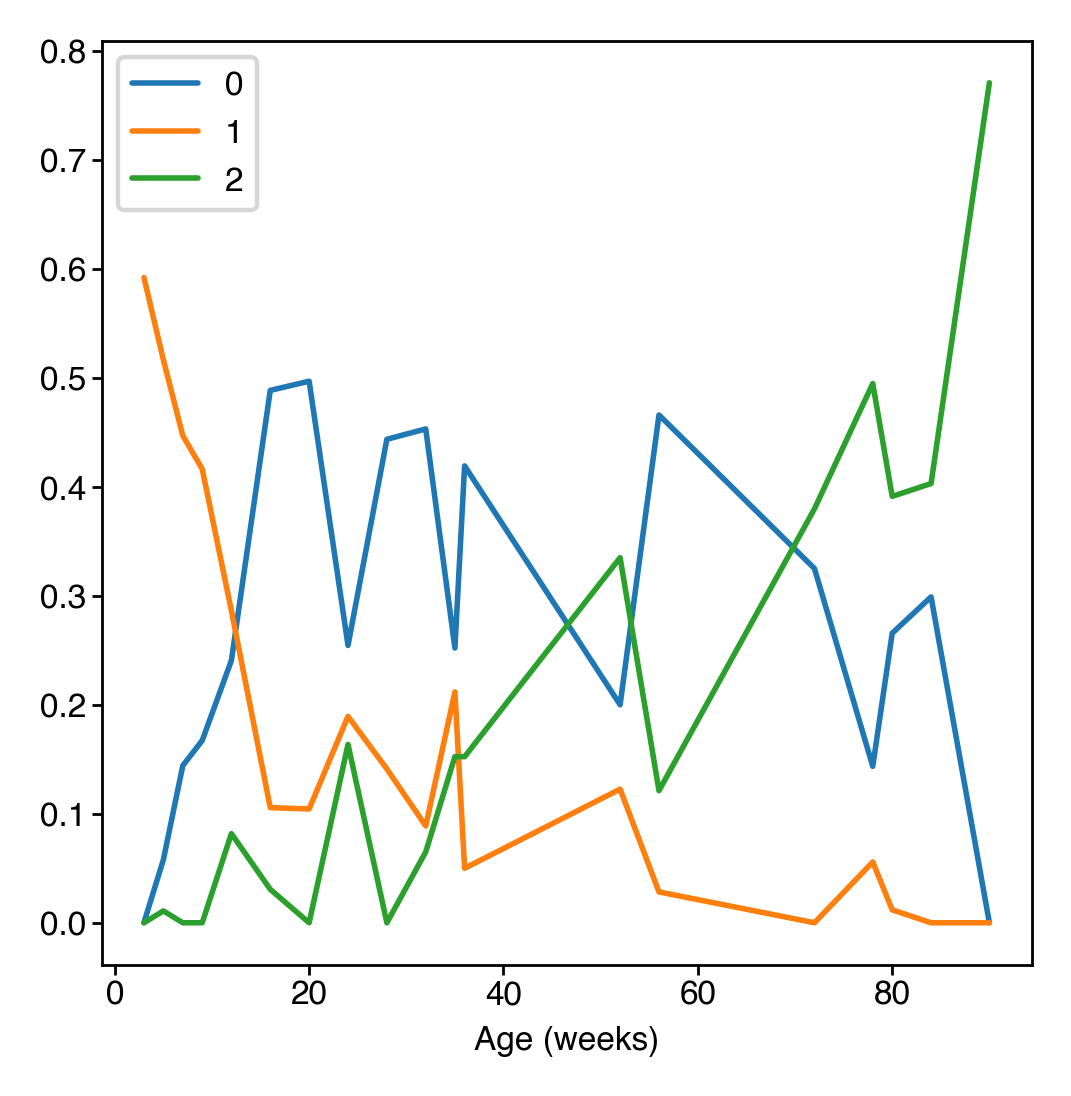

In [27]:
x = pd.DataFrame(nmf.components_.T, index=ages)
ax = x.plot()
ax.set(xlabel='Age (weeks)')

## Resample mice to get some errorbars on NMF components

In [19]:
mice = df.index.levels[1]

In [40]:
n_mice = 13
n_shuffs = 100
n_components = 3

np.random.seed(0)

components = []
for i in tqdm(range(n_shuffs)):
    choices = np.random.choice(mice, size=n_mice, replace=False)

    agg = []
    for mouse, x in new_grouping.loc[choices].groupby('mouse'):
        x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
        x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
        agg.append(x)
    agg = pd.concat(agg)

    arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

    in_data = np.concatenate(arr, axis=1).T

    nmf = NMF(n_components=n_components, max_iter=750, random_state=0)
    nmf.fit(in_data)
    components.append(nmf.components_.T)

component_df = []
for i, comp in enumerate(components):
    _df = pd.DataFrame(comp)
    _df['iteration'] = i
    component_df.append(_df)
component_df = pd.concat(component_df)

  0%|          | 0/100 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(


In [41]:
to_plt = component_df.reset_index().melt(id_vars=['iteration', 'index'])

to_plt['age'] = to_plt['index'].map(age_map) / 7

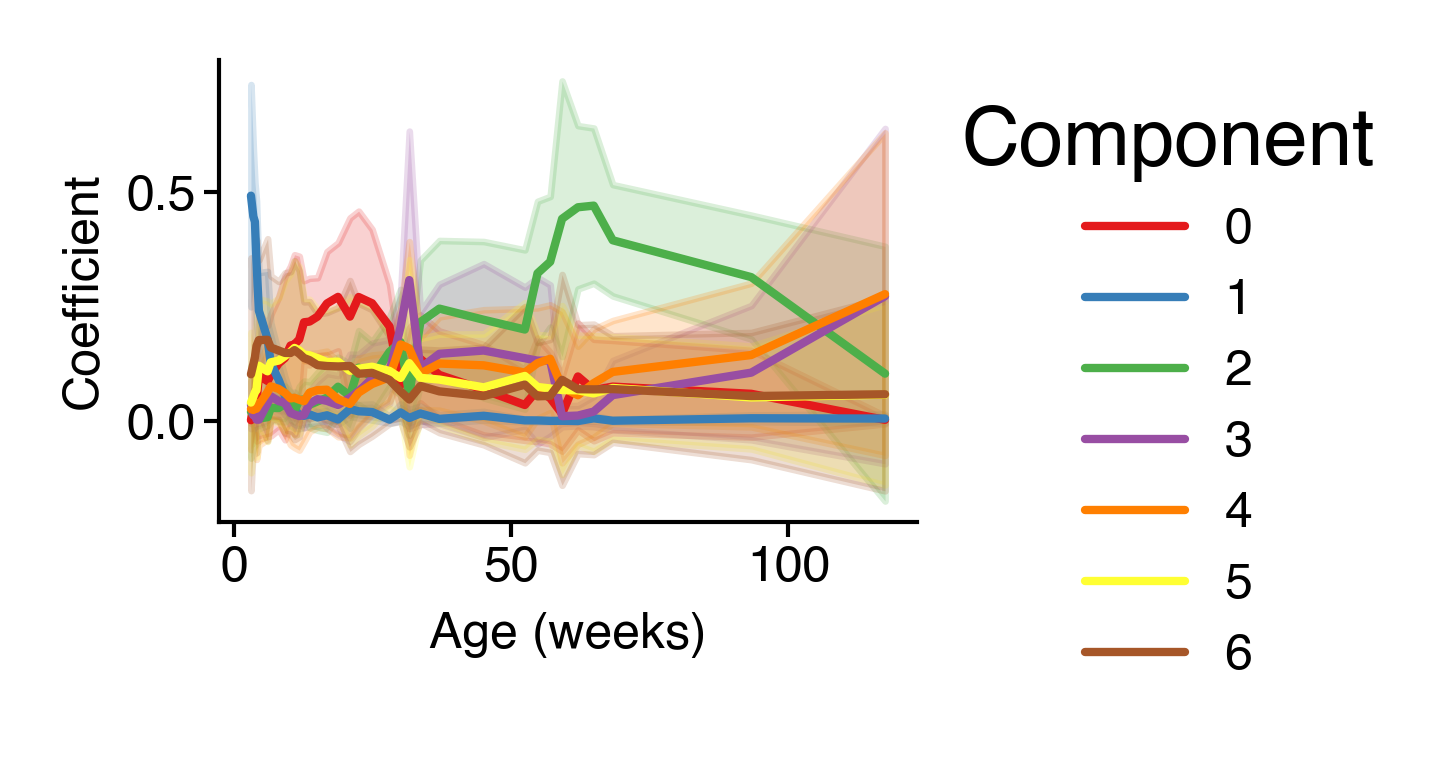

In [42]:
fig = figure(1.5, 1)
ax = sns.lineplot(
    data=to_plt, x="age", y="value", hue="variable", errorbar="sd", palette="Set1"
)
ax.set(ylim=(None, None), xlabel="Age (weeks)", ylabel="Coefficient")
legend(ax, title="Component")
sns.despine()

## Try more components

In [285]:
n_mice = 13
n_shuffs = 250
n_components = 5

np.random.seed(0)

components = []
for i in tqdm(range(n_shuffs)):
    choices = np.random.choice(mice, size=n_mice, replace=False)

    agg = []
    for mouse, x in new_grouping.loc[choices].groupby('mouse'):
        x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
        x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
        agg.append(x)
    agg = pd.concat(agg)

    arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

    in_data = np.concatenate(arr, axis=1).T

    nmf = NMF(n_components=n_components, max_iter=750, random_state=0)
    nmf.fit(in_data)
    components.append(nmf.components_.T)

component_df = []
for i, comp in enumerate(components):
    _df = pd.DataFrame(comp)
    _df['iteration'] = i
    component_df.append(_df)
component_df = pd.concat(component_df)

  0%|          | 0/250 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 7

In [286]:
to_plt = component_df.reset_index().melt(id_vars=['iteration', 'index'])

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

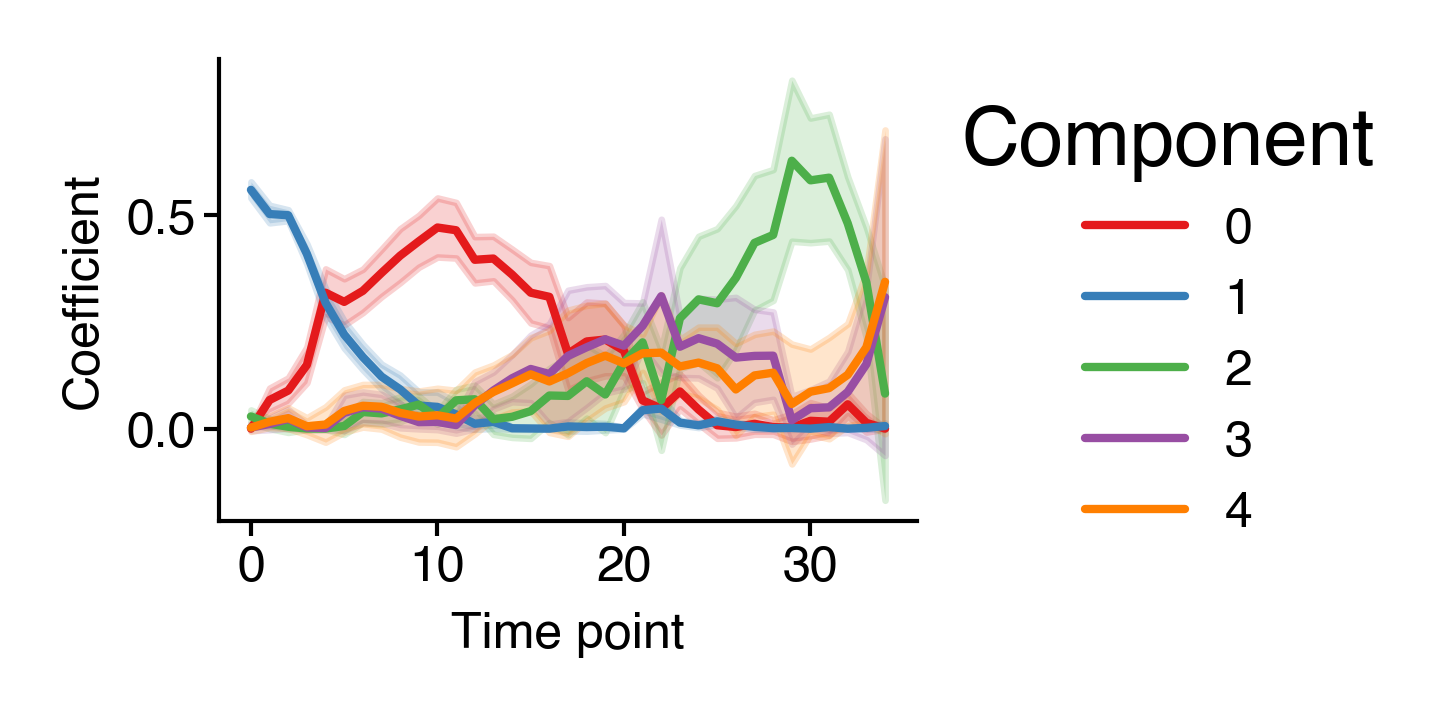

In [287]:
fig = figure(1.5, 1)
ax = sns.lineplot(
    data=to_plt, x="index", y="value", hue="variable", errorbar="sd", palette="Set1"
)
ax.set(ylim=(None, None), xlabel="Time point", ylabel="Coefficient")
legend(ax, title="Component")
sns.despine()

In [301]:
n_mice = 13
n_shuffs = 250
n_components = 4

np.random.seed(0)

components = []
for i in tqdm(range(n_shuffs)):
    choices = np.random.choice(mice, size=n_mice, replace=False)

    agg = []
    for mouse, x in new_grouping.loc[choices].groupby('mouse'):
        x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
        x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
        agg.append(x)
    agg = pd.concat(agg)

    arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

    in_data = np.concatenate(arr, axis=1).T

    nmf = NMF(n_components=n_components, max_iter=750, random_state=0)
    nmf.fit(in_data)
    components.append(nmf.components_.T)

component_df = []
for i, comp in enumerate(components):
    _df = pd.DataFrame(comp)
    _df['iteration'] = i
    component_df.append(_df)
component_df = pd.concat(component_df)

  0%|          | 0/250 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(


In [302]:
to_plt = component_df.reset_index().melt(id_vars=['iteration', 'index'])

to_plt['age'] = to_plt['index'].map(age_map)

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

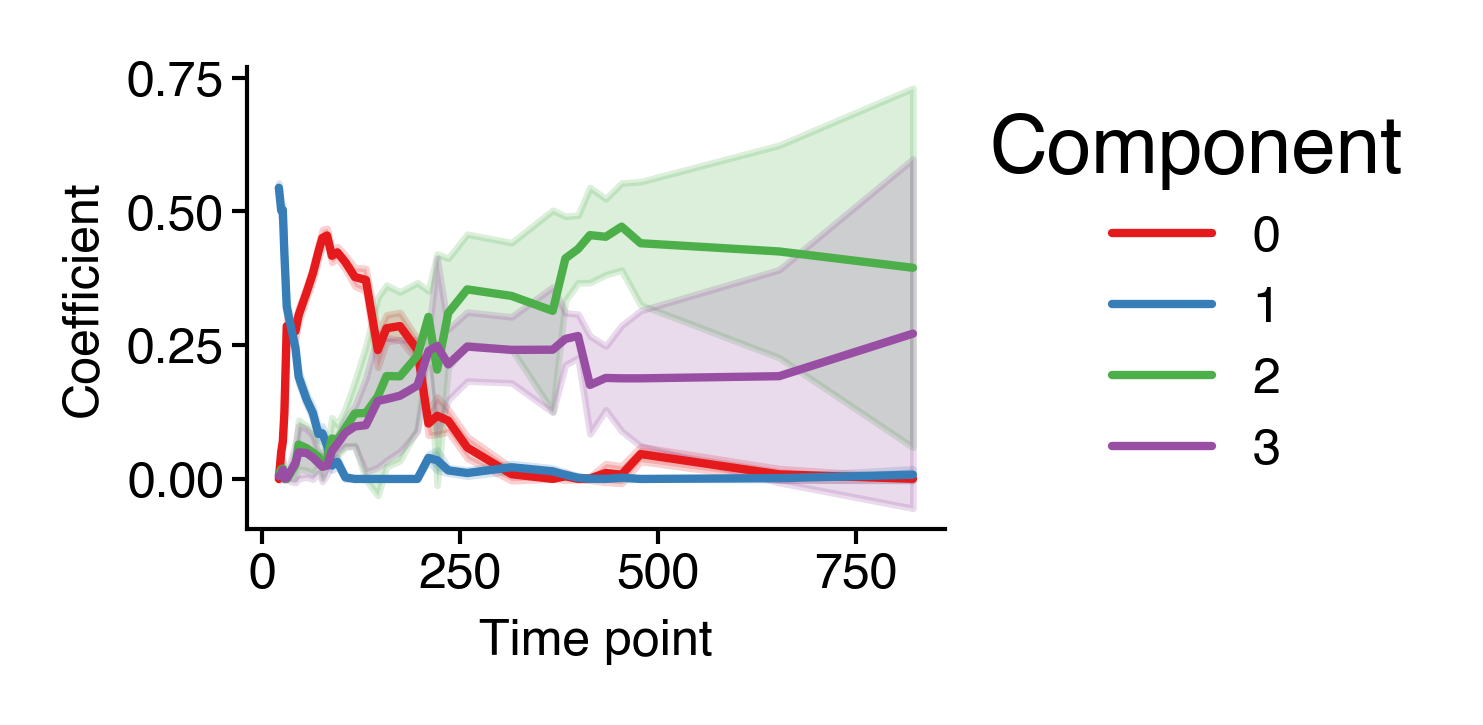

In [303]:
fig = figure(1.5, 1)
ax = sns.lineplot(
    data=to_plt, x="age", y="value", hue="variable", errorbar="sd", palette="Set1"
)
ax.set(ylim=(None, None), xlabel="Time point", ylabel="Coefficient")
legend(ax, title="Component")
sns.despine()